Enter the path of train dataset: ../NewDataset/MissingData3.txt
Imputing row 1/273 with 69 missing, elapsed time: 0.044
Imputing row 101/273 with 67 missing, elapsed time: 0.154
Imputing row 201/273 with 70 missing, elapsed time: 0.236
[KNN] Warning: 399/21567 still missing after imputation, replacing with 0


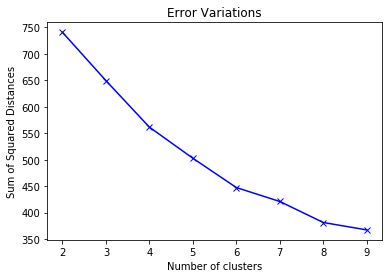

Imputing row 1/273 with 69 missing, elapsed time: 0.043
Imputing row 101/273 with 67 missing, elapsed time: 0.146
Imputing row 201/273 with 70 missing, elapsed time: 0.255
[KNN] Warning: 399/21567 still missing after imputation, replacing with 0


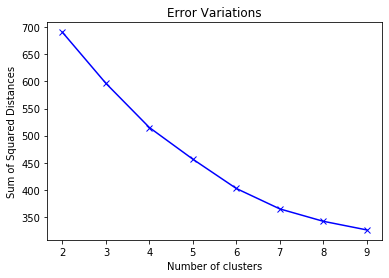

Imputing row 1/273 with 69 missing, elapsed time: 0.081
Imputing row 101/273 with 67 missing, elapsed time: 0.211
Imputing row 201/273 with 70 missing, elapsed time: 0.335
[KNN] Warning: 399/21567 still missing after imputation, replacing with 0


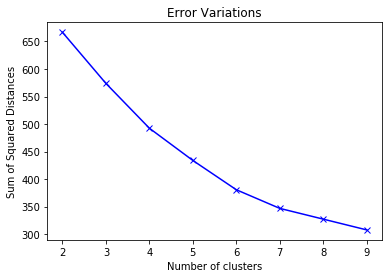

Imputing row 1/273 with 69 missing, elapsed time: 0.059
Imputing row 101/273 with 67 missing, elapsed time: 0.160
Imputing row 201/273 with 70 missing, elapsed time: 0.257
[KNN] Warning: 399/21567 still missing after imputation, replacing with 0


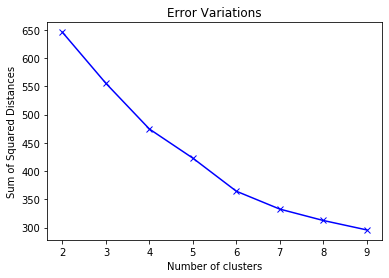

Imputing row 1/273 with 69 missing, elapsed time: 0.043
Imputing row 101/273 with 67 missing, elapsed time: 0.127
Imputing row 201/273 with 70 missing, elapsed time: 0.210
[KNN] Warning: 399/21567 still missing after imputation, replacing with 0


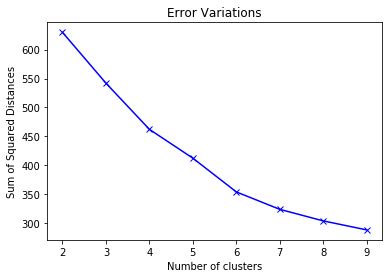

Imputing row 1/273 with 69 missing, elapsed time: 0.048
Imputing row 101/273 with 67 missing, elapsed time: 0.150
Imputing row 201/273 with 70 missing, elapsed time: 0.254
[KNN] Warning: 399/21567 still missing after imputation, replacing with 0


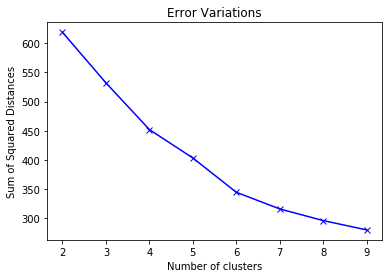

Number of clusters: 6
Imputing row 1/273 with 69 missing, elapsed time: 0.048
Imputing row 101/273 with 67 missing, elapsed time: 0.135
Imputing row 201/273 with 70 missing, elapsed time: 0.245
[KNN] Warning: 399/21567 still missing after imputation, replacing with 0
Imputing row 1/273 with 69 missing, elapsed time: 0.038
Imputing row 101/273 with 67 missing, elapsed time: 0.149
Imputing row 201/273 with 70 missing, elapsed time: 0.275
[KNN] Warning: 399/21567 still missing after imputation, replacing with 0
Imputing row 1/273 with 69 missing, elapsed time: 0.048
Imputing row 101/273 with 67 missing, elapsed time: 0.143
Imputing row 201/273 with 70 missing, elapsed time: 0.226
[KNN] Warning: 399/21567 still missing after imputation, replacing with 0
Imputing row 1/273 with 69 missing, elapsed time: 0.043
Imputing row 101/273 with 67 missing, elapsed time: 0.137
Imputing row 201/273 with 70 missing, elapsed time: 0.245
[KNN] Warning: 399/21567 still missing after imputation, replacing w

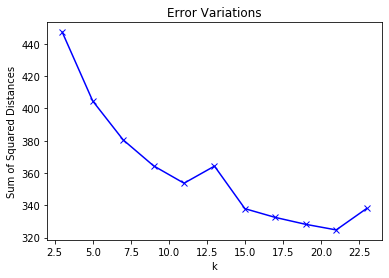

In [6]:
import pandas as pd
import numpy as np
from fancyimpute import KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def impute_missing_values(df, kval):
    return pd.DataFrame(KNN(k=kval).fit_transform(df))

def dimensionality_reduction(df):
    pca = PCA(n_components=140)
    principalComponents = pca.fit_transform(df)
    print(sum(pca.explained_variance_ratio_)*100)
    return pd.DataFrame(principalComponents)
    
def main():
    train_dataset = input('Enter the path of train dataset: ')
    train_df = pd.read_csv(train_dataset, sep='\t', header=None)
    train_df = train_df.replace(to_replace=1.0000000000000001e+99, value=np.nan)
    # print('Number of missing values: ', train_df.isna().sum())
    for knn_k in range(3, 15, 2):
        imputed_train_df = impute_missing_values(train_df, knn_k)
        final_df = imputed_train_df
        mms = MinMaxScaler()
        mms.fit(final_df)
        data_transformed = mms.transform(final_df)
        Sum_of_squared_distances = []
        kmeans_values = range(2, 10)
        for kmeans_k in range(2, 10):
            km = KMeans(n_clusters=kmeans_k)
            km = km.fit(data_transformed)
            Sum_of_squared_distances.append(km.inertia_)
        plt.plot(kmeans_values, Sum_of_squared_distances, 'bx-')
        plt.xlabel('Number of clusters')
        plt.ylabel('Sum of Squared Distances')
        plt.title('Error Variations')
        plt.show()
    kmeans_k = int(input('Number of clusters: '))
    Sum_of_squared_distances = []
    knn_values = range(3, 25, 2)
    for knn_k in range(3, 25, 2):
        imputed_train_df = impute_missing_values(train_df, knn_k)
        final_df = imputed_train_df
        mms = MinMaxScaler()
        mms.fit(final_df)
        data_transformed = mms.transform(final_df)
        km = KMeans(n_clusters=kmeans_k)
        km = km.fit(data_transformed)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(knn_values, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Error Variations')
    plt.show()
    
if __name__ == '__main__':
    main()
